In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 20, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
als_results = tt.cp_batch_fit(data, range(1,9), replicates=10, tol=1e-6)
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.7587, max error = 0.9134, mean error = 0.7925
Optimizing rank-2 models.
   10/10 converged, min error = 0.4148, max error = 0.6564, mean error = 0.5522
Optimizing rank-3 models.
   10/10 converged, min error = 0.0436, max error = 0.0436, mean error = 0.0436
Optimizing rank-4 models.
   10/10 converged, min error = 0.0434, max error = 0.0434, mean error = 0.0434
Optimizing rank-5 models.
   10/10 converged, min error = 0.0432, max error = 0.0433, mean error = 0.0432
Optimizing rank-6 models.
   10/10 converged, min error = 0.0430, max error = 0.0431, mean error = 0.0431
Optimizing rank-7 models.
   10/10 converged, min error = 0.0428, max error = 0.0430, mean error = 0.0429
Optimizing rank-8 models.
   10/10 converged, min error = 0.0426, max error = 0.0428, mean error = 0.0427


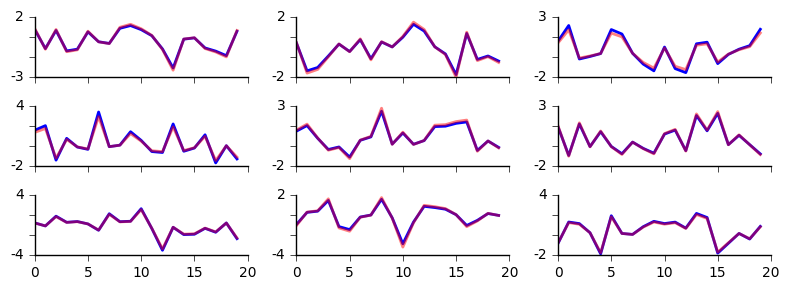

In [4]:
fig, axes = tt.plot_factors(factors, color='b', lw=2)
tt.plot_factors(als_factors, color='r', lw=2, alpha=0.5, fig=fig);

(<matplotlib.figure.Figure at 0x111c332e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x111967d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111cbec88>], dtype=object))

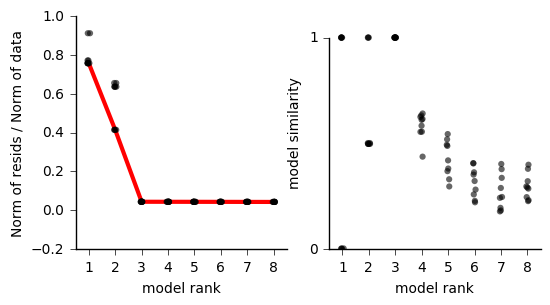

In [5]:
tt.plot_scree(als_results)